<a href="https://colab.research.google.com/github/samarthya04/IIIT-A-internship/blob/main/Heart_Failure_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [137]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = '/content/drive/MyDrive/IIIT-A-Internship/heart_failure_clinical_records.csv'
df = pd.read_csv(path)

In [138]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [139]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [140]:
train_ratio = 0.70
total_rows = df.shape[0]
train_size = int(total_rows * train_ratio)

In [141]:
X_data = df.drop(['DEATH_EVENT'], axis=1)
y = df['DEATH_EVENT']

In [107]:
#Normalization
X = ((X_data - np.min(X_data))/(np.max(X_data) - np.min(X_data))).values  #Min-Max Normalization

In [142]:
X_train = X[0:train_size]
X_test = X[train_size:]
y_train = y.values[0:train_size]
y_test = y.values[train_size:]

# Logistic Regression

In [143]:
#Reshape

X_train = X_train.T
y_train = y_train.reshape(1, X_train.shape[1])

X_test = X_test.T
y_test = y_test.reshape(1, X_test.shape[1])

In [144]:
X_train.shape

(12, 3500)

In [145]:
def sigmoid(x):
  return 1/(1 + np.exp(-x))

In [146]:
def LogisticRegressionModel(X, y, learning_rate, iterations):
  m = X_train.shape[1]
  n = X_train.shape[0]

  W = np.zeros((n, 1))
  B = 0
  cost_list = []

  for i in range(iterations):
    Z = np.dot(W.T, X) + B
    A = sigmoid(Z)

    cost = -(1/m)*np.sum(y*np.log(A) + (1-y)*np.log(1-A))

    dW = (1/m)*np.dot(A-y, X.T)
    dB = (1/m)*np.sum(A - y)

    W = W - learning_rate*dW.T
    B = B - learning_rate*dB

    cost_list.append(cost)
    if(i%(iterations/10) == 0):
      print("cost after ", i, "iteration is : ", cost)

  return W, B, cost_list

In [147]:
iterations = 10000
learning_rate = 0.005
W, B, cost_list = LogisticRegressionModel(X_train, y_train, learning_rate = learning_rate, iterations = iterations)

cost after  0 iteration is :  0.6931471805599455
cost after  1000 iteration is :  0.629279205777537
cost after  2000 iteration is :  0.6244984755812281
cost after  3000 iteration is :  0.624083711936426
cost after  4000 iteration is :  0.6240444234607674
cost after  5000 iteration is :  0.6240392873014933
cost after  6000 iteration is :  0.624037346510903
cost after  7000 iteration is :  0.6240357401724418
cost after  8000 iteration is :  0.6240342015033216
cost after  9000 iteration is :  0.624032704724251


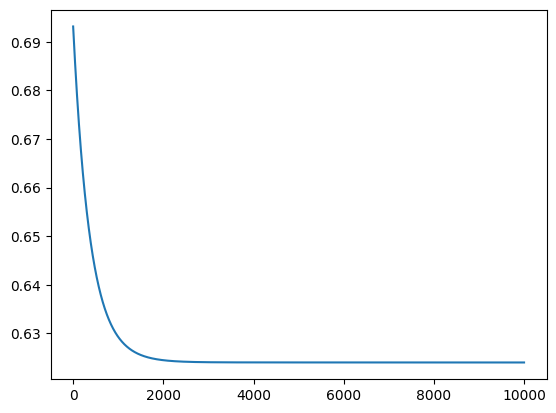

In [148]:
plt.plot(np.arange(iterations), cost_list)
plt.show()

In [149]:
def accuracy(X, y, W, B):
  Z = np.dot(W.T, X) + B
  A = sigmoid(Z)

  A = A > 0.5

  A = np.array(A, dtype = 'int64')

  acc = (1 - np.sum(np.absolute(A - y))/y.shape[1])*100

  print("Accuracy: ", acc)

In [150]:
accuracy(X_test, y_test, W, B)

Accuracy:  69.33333333333334


# Decision Tree

In [162]:
class Node:
  def __init__(self, feature=None, threshold=None, left=None, right=None, *, value=None):
    self.feature=feature
    self.threshold=threshold
    self.left=left
    self.right=right
    self.value=None

  def is_leaf_node():
    return self.value is not None

In [160]:
class DecisionTree:
  def __init__(self, min_sample_split=2, max_depth=100, n_features=None):
    self.min_sample_split=min_sample_split
    self.max_depth=max_depth
    self.n_features=n_features
    self.root=None

  def fit(self, X, y):
    self.n_features = X.shape[1] if not self.n_features else min(X.shape[1], self.n_features)
    self.root = self._grow_tree(X, y)

  def _grow_tree(self, X, y):

  def predict():

0.8952403313144995

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
y_pred_3 = rf.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_3))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1037
           1       1.00      0.98      0.99       463

    accuracy                           0.99      1500
   macro avg       0.99      0.99      0.99      1500
weighted avg       0.99      0.99      0.99      1500



In [ ]:
print("Accuracy: ", accuracy_score(y_test, y_pred_3)*100,"%")

Accuracy:  99.26666666666667 %


In [ ]:
confM = confusion_matrix(y_test, y_pred_3)
confM

array([[1037,    0],
       [  11,  452]])

<Axes: >

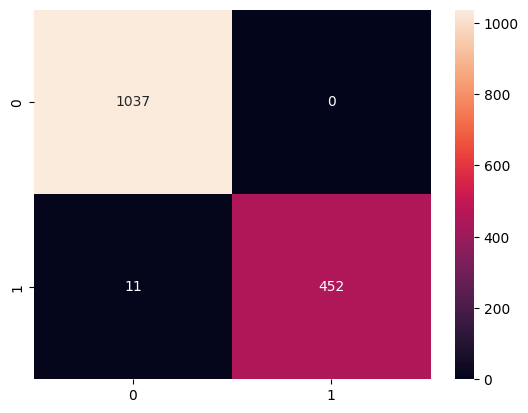

In [ ]:
sns.heatmap(confM, annot=True, fmt='d')

# K-NN Classification

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_4 = knn.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_4))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1037
           1       0.90      0.94      0.92       463

    accuracy                           0.95      1500
   macro avg       0.94      0.95      0.94      1500
weighted avg       0.95      0.95      0.95      1500



In [ ]:
accuracy_score(y_test, y_pred_4)*100

95.0

In [ ]:
confusion_matrix(y_test, y_pred_4)

array([[991,  46],
       [ 29, 434]])

<Axes: >

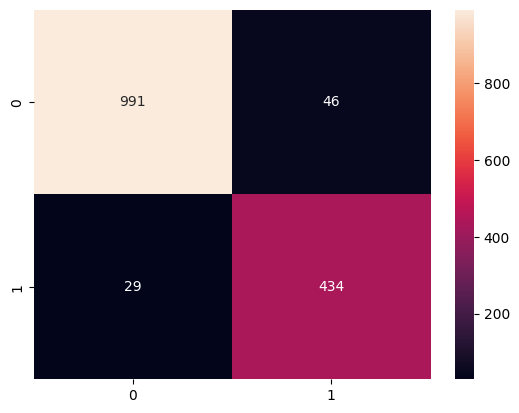

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred_4), annot=True, fmt='g')

# SVM Classifier

In [ ]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred_5 = svc.predict(X_test)
print(classification_report(y_test, y_pred_5))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1037
           1       0.76      0.63      0.69       463

    accuracy                           0.82      1500
   macro avg       0.80      0.77      0.78      1500
weighted avg       0.82      0.82      0.82      1500

